In [7]:
import os
import json
import IPython.display as ipd
import numpy as np
import pandas as pd
import keras
import sklearn as skl
from sklearn.model_selection import train_test_split
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, LabelBinarizer, StandardScaler
import tensorflow as tf
import utils
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from multiprocessing import Pool
import skimage.io
import warnings

In [4]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

25000
0 = data/fma_medium/000/000002.mp3


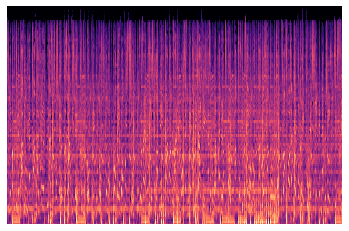

1 = data/fma_medium/000/000003.mp3


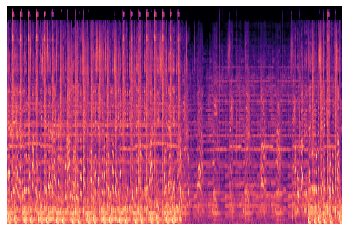

2 = data/fma_medium/000/000005.mp3


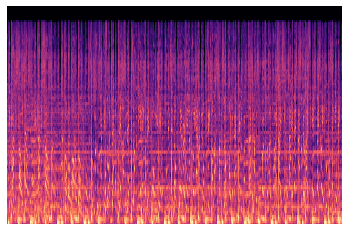

3 = data/fma_medium/000/000010.mp3


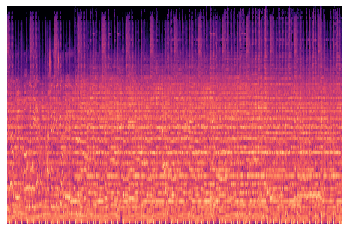

4 = data/fma_medium/000/000134.mp3


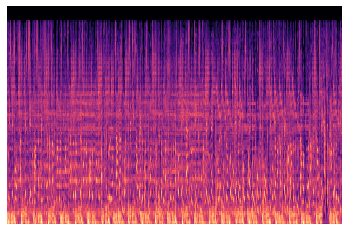

In [8]:
warnings.filterwarnings("ignore")
base_path = "data/fma_medium/"
files = sorted(list(glob(base_path + "/*/*.mp3")))

hl = 512 # number of samples per time-step in spectrogram
hi = 128 # Height of image
wi = 384 # Width of image # of time steps

print(len(files))
base_out = "melSpectrogramsColored/" # change to some direcotry
for i in range(len(files)):
#     print(i)
    file = files[i]
    print(str(i) + " = " + file)
    filename = os.path.basename(file)[:-4]
    try:
        x, sr = librosa.load(file, sr=None, mono=True)
        window = x[0:wi*hl]

        stft = np.abs(librosa.stft(y = x, n_fft=2048, hop_length=512))
        mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
        mel = librosa.power_to_db(mel, ref=np.max)
#         librosa.display.specshow(mel, sr=sr, hop_length=512, x_axis='time', y_axis='mel');
#         plt.show()
        # min-max scale to fit inside 8-bit range
        img = scale_minmax(mel, 0, 255).astype(np.uint8)
        skimage.io.imsave(base_out + filename + ".png", img)
    except:
        print("Corrupted:" + str(file))
        